# **Coursework**

In [ ]:
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Download Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.4.0/spark-3.4.0-bin-hadoop3.tgz
# Unzip the file
!tar xf spark-3.4.0-bin-hadoop3.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.4.0-bin-hadoop3'

In [ ]:
# Install library for finding Spark
!pip install -q findspark
# Import the libary
import findspark
# Initiate findspark
findspark.init()
# Check the location for Spark
findspark.find()

'/content/spark-3.4.0-bin-hadoop3'

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [ ]:
# Import a Spark function from library
from pyspark.sql.functions import col

In [ ]:
from pyspark.sql import SparkSession
 
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()
 
df = spark.read.csv('googleplaystore.csv', header=True, inferSchema=True)
df.show()

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|      Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design|   January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|  January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|    August 1, 2018|             1.2.4|4.0.3 

# **Data Cleaning**
Data cleaning is an an important and first step in data preprocessing . There are many data cleaning steps that can be done in order to improve the quality and accuracy of the data when working with the selected dataset which has been implemented below:


In [ ]:
# Droping duplicates
df = df.dropDuplicates()

# Removing rows with missing values
df = df.dropna()

# Removing the "$" sign from the 'Price' column and converting it to a float
df = df.withColumn("Price", col("Price").substr(2,100).cast("float"))


# Removing rows with null values in the "Rating" column
df = df.filter(col("Rating").isNotNull())

# Droping the unrequired columns
df = df.drop(col('Last Updated')).drop(col('Current Ver')).drop(col('Android Ver')).drop(col('App')).drop(col('Last_Updated_date')).drop(col('Content Rating'))


# Converting 'Reviews' column to integer
df = df.withColumn('Reviews', col('Reviews').cast('integer'))

# Importing necessary libraries
from pyspark.sql.functions import when

# Converting'Type' column to binary
df = df.withColumn('Type', when(df.Type == 'Free', 0).otherwise(1))


df.show()



+-------------------+------+-------+------------------+------------+----+-----+--------------------+
|           Category|Rating|Reviews|              Size|    Installs|Type|Price|              Genres|
+-------------------+------+-------+------------------+------------+----+-----+--------------------+
|  AUTO_AND_VEHICLES|   4.6|   7880|Varies with device|    100,000+|   0| null|     Auto & Vehicles|
|BOOKS_AND_REFERENCE|   4.4| 341157|               30M| 10,000,000+|   0| null|   Books & Reference|
|          EDUCATION|   4.5|   1929|              2.5M|    500,000+|   0| null|           Education|
|          EDUCATION|   4.4|  54798|               11M|  1,000,000+|   0| null|           Education|
|             EVENTS|   NaN|      6|              9.7M|        100+|   0| null|              Events|
|             EVENTS|   4.2|   3200|Varies with device|    100,000+|   0| null|              Events|
| HEALTH_AND_FITNESS|   4.5|  75571|Varies with device|  1,000,000+|   0| null|    Health &

In [ ]:
#replacing null values of column 'Price' with 0.
df = df.withColumn("Price", when(df.Price.isNull(), 0).otherwise(df.Price))

In [ ]:
# Replacing '+' and ',' with '' and 'Free' with '0' in column 'Installs'
from pyspark.sql.functions import regexp_replace, when

df = df.withColumn('Installs_c', when(df.Installs.endswith('Free'), '0')
                .otherwise(regexp_replace(df.Installs, '\+|,', '')))

# Convert Installs_cleaned column to integer
df = df.withColumn('Installs_c', df.Installs_c.cast('int'))
df = df.drop('Installs')

In [ ]:
#converting datatype of column 'Rating' to float
from pyspark.sql.types import FloatType

df = df.withColumn("Rating", df["Rating"].cast(FloatType()))

In [ ]:
df.printSchema()

root
 |-- Category: string (nullable = true)
 |-- Rating: float (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Size: string (nullable = true)
 |-- Type: integer (nullable = false)
 |-- Price: float (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Installs_c: integer (nullable = true)



In [ ]:
#replacing NaN values of column 'Rating' with 0.
df = df.fillna(0, subset=["Rating"])

In [ ]:
df.show()

+-------------------+------+-------+------------------+----+-----+--------------------+----------+
|           Category|Rating|Reviews|              Size|Type|Price|              Genres|Installs_c|
+-------------------+------+-------+------------------+----+-----+--------------------+----------+
|  AUTO_AND_VEHICLES|   4.6|   7880|Varies with device|   0|  0.0|     Auto & Vehicles|    100000|
|BOOKS_AND_REFERENCE|   4.4| 341157|               30M|   0|  0.0|   Books & Reference|  10000000|
|          EDUCATION|   4.5|   1929|              2.5M|   0|  0.0|           Education|    500000|
|          EDUCATION|   4.4|  54798|               11M|   0|  0.0|           Education|   1000000|
|             EVENTS|   0.0|      6|              9.7M|   0|  0.0|              Events|       100|
|             EVENTS|   4.2|   3200|Varies with device|   0|  0.0|              Events|    100000|
| HEALTH_AND_FITNESS|   4.5|  75571|Varies with device|   0|  0.0|    Health & Fitness|   1000000|
| HEALTH_A

In [ ]:
#Converting the data of column 'Category' to integer
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Creating a dictionary to map categories to integers
CategoryL = df.select('Category').distinct().rdd.flatMap(lambda x: x).collect()
CategoryDict = {}
for i in range(len(CategoryL)):
    CategoryDict[CategoryL[i]] = i

# Defining UDF to convert categories to integers
def convert_category(category):
    return CategoryDict.get(category)

category_udf = udf(convert_category, IntegerType())

# Applying UDF to 'Category' column
df = df.withColumn('Category', category_udf('Category'))

In [ ]:
# Removing 'M' from column 'Size' and converting it to float
from pyspark.sql.functions import regexp_replace, when

df = df.withColumn('Size_c', when(df.Size.endswith('M'), 
                regexp_replace(df.Size, 'M', '').cast('float')).otherwise(0.0))

# Converting 'k' to 'M' and adding to 'Size_c' column
df = df.withColumn('Size_c', when(df.Size.endswith('k'), 
                (regexp_replace(df.Size, 'k', '').cast('float')/1024)).otherwise(df.Size_c))

# Drop the original 'Size' column
df = df.drop('Size')


In [ ]:
#converting the column 'Genres' to integer
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Defining a function to convert the column to integer
GenresL = df.select('Genres').distinct().rdd.flatMap(lambda x: x).collect()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i

def convert_genre(genre):
    return GenresDict.get(genre)

# Creating the UDF to apply to the column 'Genres' 
convert_genre_udf = udf(convert_genre, IntegerType())

# Applying the UDF to the column 'Genres' 
df = df.withColumn('Genres_Int', convert_genre_udf('Genres'))

df = df.drop('Genres')

# Showing the 50 rows of the dataframe
df.show(50)

+--------+------+-------+----+-----+----------+------------------+----------+
|Category|Rating|Reviews|Type|Price|Installs_c|            Size_c|Genres_Int|
+--------+------+-------+----+-----+----------+------------------+----------+
|       5|   4.6|   7880|   0|  0.0|    100000|               0.0|         5|
|      11|   4.4| 341157|   0|  0.0|  10000000|              30.0|        86|
|      20|   4.5|   1929|   0|  0.0|    500000|               2.5|         2|
|      20|   4.4|  54798|   0|  0.0|   1000000|              11.0|         2|
|       0|   0.0|      6|   0|  0.0|       100| 9.699999809265137|        80|
|       0|   4.2|   3200|   0|  0.0|    100000|               0.0|        80|
|       9|   4.5|  75571|   0|  0.0|   1000000|               0.0|        59|
|       9|   4.6|  20301|   0|  0.0|   1000000|              22.0|        59|
|       9|   4.2| 270294|   0|  0.0|   5000000|              58.0|        59|
|      25|   4.8|   3052|   0|  0.0|    100000|              12.

In [ ]:
print(df)

DataFrame[Category: int, Rating: float, Reviews: int, Type: int, Price: float, Installs_c: int, Size_c: double, Genres_Int: int]


# **Data Visualization**
Data visualization is a graphical representation of a data. Some of the techniques such as bar plot, box plot, histogram and scatter plot has been used for data visualization of the selected dataset.

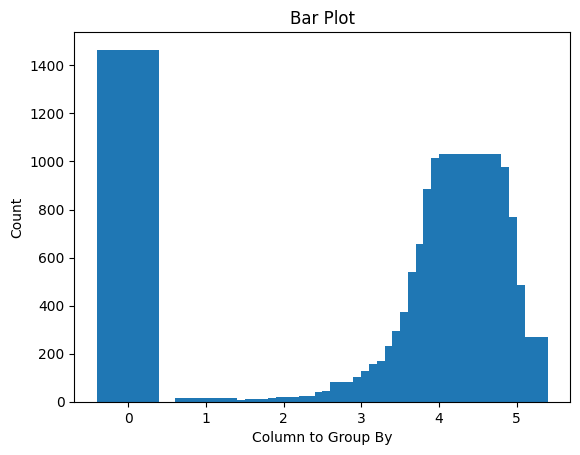

In [ ]:
#BAR PLOT
import matplotlib.pyplot as plt
import pyspark.sql.functions as F


# Grouping by a column and computing the count
grouped_df = df.groupBy("Rating").agg(F.count("*").alias("count"))

# Converting PySpark DataFrame to Pandas DataFrame
pandas_df = grouped_df.toPandas()

# Creating a bar plot using Matplotlib
plt.bar(pandas_df["Rating"], pandas_df["count"])
plt.xlabel("Column to Group By")
plt.ylabel("Count")
plt.title("Bar Plot")
plt.show()


Text(0, 0.5, 'Frequency')

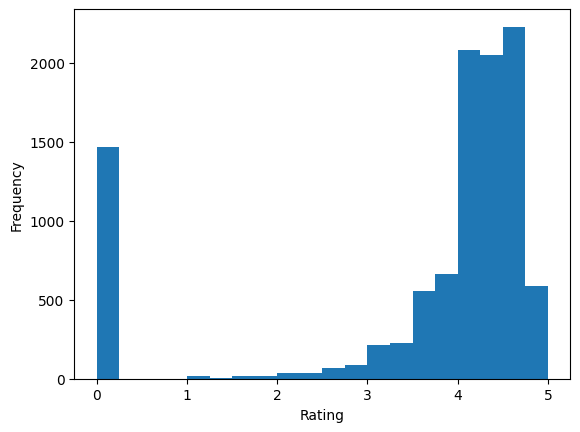

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()


# Histogram
plt.hist(df_pd['Rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Rating')

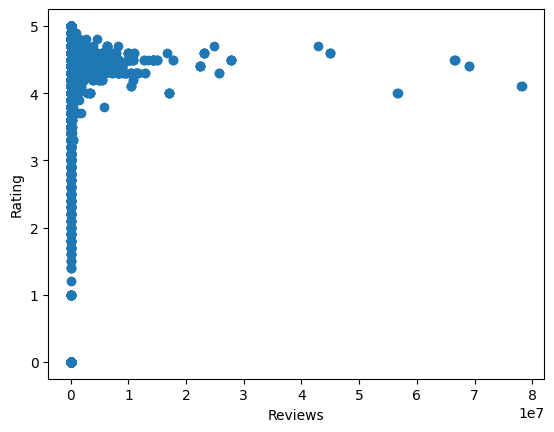

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Scatter plot
plt.scatter(df_pd['Reviews'], df_pd['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')

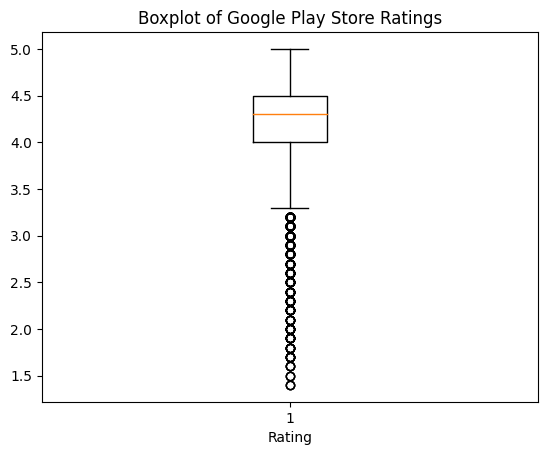

In [ ]:
#BOX PLOT

# Importing required libraries
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

# Calculating summary statistics for Rating column
summary = df.select(F.mean("Rating"), F.stddev("Rating")).collect()[0]

# Calculating upper and lower limits for boxplot
lower_limit = summary[0] - (1.5 * summary[1])
upper_limit = summary[0] + (1.5 * summary[1])

# Filtering dataframe to only include values within the boxplot limits
df_filtered = df.filter((df.Rating >= lower_limit) & (df.Rating <= upper_limit))

# Creating boxplot using matplotlib
plt.boxplot(df_filtered.select("Rating").rdd.flatMap(lambda x: x).collect())

# Setting plot title and x-axis label
plt.title("Boxplot of Google Play Store Ratings")
plt.xlabel("Rating")

# Showing plot
plt.show()


In [ ]:
df = df.na.drop()

**Correlation**

In [ ]:
#Showing correlations between the columns of the dataset
from pyspark.sql.functions import corr

# Calculating Pearson correlation between columns
correlations = df.select([corr(col1, col2).alias((col1 + '__' + col2)) 
                          for col1 in df.columns for col2 in df.columns])

# Printing the correlation matrix
correlations.show()

+------------------+--------------------+-------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------+-------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------------+-------------------+----------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+----------+------------------+--------------------+--------------------+-------------------+-----------------+--------------------+--------------------+------------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+----------------------+--------------------+----------------------+--------------------+------------------

# **Linear Regression Model**
It is a modeling technique that is used to estimate the linear relationship between dependent and independent variable. In this case, our dependent variable is app rating and the independent variables are Reviews, Size, Installs, Price, Rating, Category and Type.

In [ ]:
#defining a function to evaluate regression predictions using metrics
from pyspark.ml.evaluation import RegressionEvaluator

def Evaluationmatrix(predictions):
    evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='mse')
    mse = evaluator.evaluate(predictions)
    print('Mean Squared Error: ', mse)

    evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='mae')
    mae = evaluator.evaluate(predictions)
    print('Mean Absolute Error: ', mae)

    evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmsle')
    rmsle = evaluator.evaluate(predictions)
    #Printing results
    print('Mean Squared Log Error: ', rmsle)

In [ ]:
from pyspark.sql import Row

# Defining the schema for the evaluation matrix
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

evaluation_schema = StructType([
    StructField('Series Name', StringType(), True),
    StructField('Mean Squared Error', DoubleType(), True),
    StructField('Mean Absolute Error', DoubleType(), True),
    StructField('Mean Squared Log Error', DoubleType(), True)
])

# Creating a list of Row objects for storing the evaluation matrix
evaluation_rows = []

# Creating function for adding evaluation matrix to the list of rows
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = Row(
        'Series Name', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Squared Log Error'
    )(name, 
      metrics.mean_squared_error(y_true,y_predict), 
      metrics.mean_absolute_error(y_true,y_predict), 
      metrics.mean_squared_log_error(y_true,y_predict))
    evaluation_rows.append(dict_matrix)

# Creating a DataFrame from the list of rows using the evaluation schema
evaluation_df = spark.createDataFrame(evaluation_rows, evaluation_schema)

In [ ]:
#Performing linear regression on the input features using the LinearRegression algorithm, 
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# Integer encoding
assembler = VectorAssembler(inputCols=['Reviews', 'Size_c', 'Installs_c', 'Price','Rating','Category','Type'], outputCol='features')
feature_vector = assembler.transform(df).select('features', 'Rating')
train_data, test_data = feature_vector.randomSplit([0.7, 0.3], seed=1)

lr = LinearRegression(featuresCol='features', labelCol='Rating')
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

#Evaluating the performance of the model using three regression evaluation metrics
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='Rating', metricName='mse')
mse = evaluator.evaluate(lr_predictions)
print('Mean Squared Error: ', mse)

evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='Rating', metricName='mae')
mae = evaluator.evaluate(lr_predictions)
print('Mean Absolute Error: ', mae)

evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='Rating', metricName='r2')
r2 = evaluator.evaluate(lr_predictions)

#Printing results
print('R-squared: ', r2)

Mean Squared Error:  2.7085654308630698e-30
Mean Absolute Error:  1.341771483875251e-15
R-squared:  1.0


In [ ]:
#Fitting linear regression models on integer-encoded and dummy-encoded data 
from pyspark.sql.functions import col
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting  relevant columns for modeling
df = df.select("Reviews", "Size_c", "Installs_c", "Type", "Price", "Rating")

# Defining feature vector
assembler = VectorAssembler(inputCols=["Reviews", "Size_c", "Installs_c", "Type", "Price"],
                            outputCol="features")

# Transforming data
df_features = assembler.transform(df).select("features", "Rating")

# Splitting data into train and test sets
(train_data, test_data) = df_features.randomSplit([0.7, 0.3], seed=100)

# Training linear regression model on integer-encoded data
lr_int = LinearRegression(labelCol="Rating", featuresCol="features")
lr_model_int = lr_int.fit(train_data)
lr_results_int = lr_model_int.transform(test_data)

# Training linear regression model on dummy-encoded data
df_model_dum = df.select("Reviews", "Size_c", "Installs_c", "Type", "Price", "Rating")
assembler_dum = VectorAssembler(inputCols=["Reviews", "Size_c", "Installs_c", "Type", "Price"],
                                outputCol="features")
df_features_dum = assembler_dum.transform(df_model_dum).select("features", "Rating")
(train_data_dum, test_data_dum) = df_features_dum.randomSplit([0.7, 0.3], seed=100)
lr_dum = LinearRegression(labelCol="Rating", featuresCol="features")
lr_model_dum = lr_dum.fit(train_data_dum)
lr_results_dum = lr_model_dum.transform(test_data_dum)

# Evaluating the models using the root mean squared error metric.
evaluator = RegressionEvaluator(labelCol="Rating", predictionCol="prediction", metricName="rmse")
rmse_int = evaluator.evaluate(lr_results_int)
rmse_dum = evaluator.evaluate(lr_results_dum)

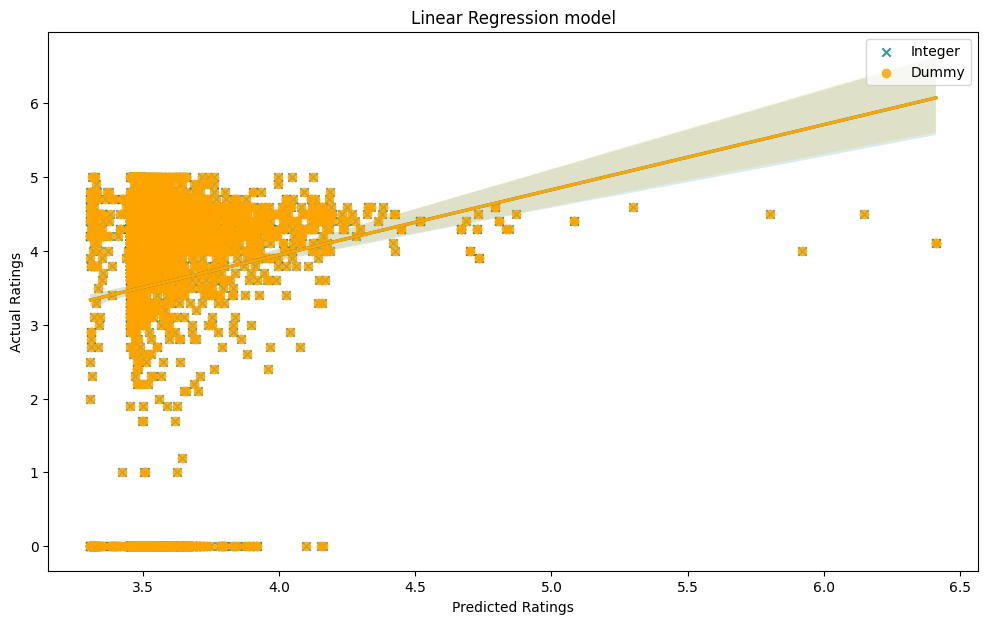

In [ ]:
# Creating a scatter plot with regression lines to compare the performance of two linear regression models (one trained on integer-encoded data and the other on dummy-encoded data) 

int_df = lr_results_int.select("prediction", "Rating").toPandas()
dum_df = lr_results_dum.select("prediction", "Rating").toPandas()

plt.figure(figsize=(12,7))
sns.regplot(x=int_df["prediction"], y=int_df["Rating"], color="teal", label="Integer", marker="x")
sns.regplot(x=dum_df["prediction"], y=dum_df["Rating"], color="orange", label="Dummy")
plt.legend()
plt.title('Linear Regression model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [ ]:
# Printing mean and standard deviation of predicted ratings
print('Actual mean of population: ' + str(df.select(col("Rating")).agg({"Rating": "mean"}).collect()[0][0]))
print('Integer encoding(mean): ' + str(lr_results_int.select(col("prediction")).agg({"prediction": "mean"}).collect()[0][0]))
print('Dummy encoding(mean): ' + str(lr_results_dum.select(col("prediction")).agg({"prediction": "mean"}).collect()[0][0]))
print('Integer encoding(std): ' + str(lr_results_dum.select(col("prediction")).agg({"prediction": "std"}).collect()[0][0]))
print('Dummy encoding(std): ' + str(lr_results_dum.select(col("prediction")).agg({"prediction": "std"}).collect()[0][0]))

Actual mean of population: 3.595315816931129
Integer encoding(mean): 3.602005574087875
Dummy encoding(mean): 3.602005574087875
Integer encoding(std): 0.22967937835175264
Dummy encoding(std): 0.22967937835175264


**Conclusion**

In conclusion, here we have predicted app rating through a prediction model which is Linear Regression Model. The values obtained are:

Mean Squared Error:  2.7085654308630698e-30

Mean Absolute Error:  1.341771483875251e-15

R-squared:  1.0

Actual mean of population: 3.595315816931129

Integer encoding(mean): 3.602005574087875

Dummy encoding(mean): 3.602005574087875

Integer encoding(std): 0.22967937835175264

Dummy encoding(std): 0.22967937835175264

# **SVM Model**
Support Vector Machine is a Machine learning Algorithim which is used for analysis and classification. Here, we have used this model to predict the App Rating of google playstore Apps. 

In [ ]:
# Importing necessary libraries
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import seaborn as sns
import matplotlib.pyplot as plt
# Creates a vector column by combining all columns in the dataframe except the 'Rating' column using the VectorAssembler class in PySpark.
assembler = VectorAssembler(inputCols=[col for col in df.columns if col != 'Rating'], outputCol='new_feature')
df = assembler.transform(df).select('new_feature', 'Rating')

# Splitting the data into training and testing sets
train_data, test_data = df.randomSplit([0.7, 0.3])

# Creating SVM model with integer encoding
svm_int = LinearRegression(featuresCol='new_feature', labelCol='Rating')
svm_int_model = svm_int.fit(train_data)

# Making predictions and evaluating the model with integer encoding
int_results = svm_int_model.transform(test_data)
int_results = int_results.select('Rating', 'prediction').withColumnRenamed('prediction', 'Results2')

# Creating SVM model with dummy encoding
#df2 = df2.drop('Genres', 'Category_c', 'Genres_c')
assembler = VectorAssembler(inputCols=[col for col in df.columns if col != 'Rating'], outputCol='n_feature')
df = assembler.transform(df).select('n_feature', 'Rating')

# Splitting the data into training and testing sets
train_data_d, test_data_d = df.randomSplit([0.7, 0.3])

# Creating SVM model with dummy encoding
svm_dum = LinearRegression(featuresCol='n_feature', labelCol='Rating')
svm_dum_model = svm_dum.fit(train_data_d)

# Making predictions and evaluating the model with dummy encoding
dum_results = svm_dum_model.transform(test_data_d)
dum_results = dum_results.select('Rating', 'prediction').withColumnRenamed('prediction', 'Results2_d')

# **Result**
The table below shows the actual ratings and the predicted ratings.

In [ ]:
print("Integer Encoding Results:")
int_results.show()

print("Dummy Encoding Results:")
dum_results.show()

Integer Encoding Results:
+------+------------------+
|Rating|          Results2|
+------+------------------+
|   5.0|3.4605477185604046|
|   0.0|3.4605478235180436|
|   5.0|3.4605478531459757|
|   3.0|3.4605478679599417|
|   0.0| 3.460547897587874|
|   3.6|3.4605489767921958|
|   3.8|3.4605490656759925|
|   4.7| 3.460549139745823|
|   3.0| 3.460549243443585|
|   4.4|3.4605492878854833|
|   2.7|3.4605598429052464|
|   3.1| 3.460554056367201|
|   4.6| 3.460549628606703|
|   4.5|3.4605496878625672|
|   3.0| 3.472210629693522|
|   3.9|3.4605604947197532|
|   4.5|3.4605505470725992|
|   3.8|3.4605611613482266|
|   3.9|3.4605622279537838|
|   4.3|  3.46056224276775|
+------+------------------+
only showing top 20 rows

Dummy Encoding Results:
+------+------------------+
|Rating|        Results2_d|
+------+------------------+
|   5.0| 3.472809959841211|
|   3.0|3.4728099726405155|
|   5.0| 3.472810102265859|
|   0.0|3.4728112705262455|
|   0.0|  3.47281128332555|
|   3.0|  3.47281128332555|


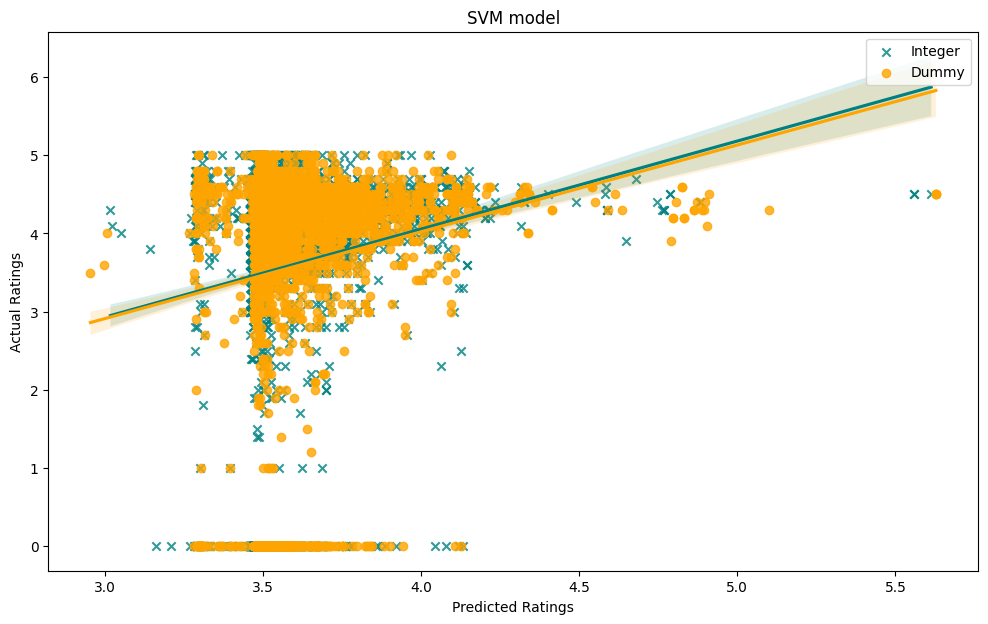

In [ ]:
# Creating a scatter plot to compare the results of the two models
int_results_pd = int_results.toPandas()
dum_results_pd = dum_results.toPandas()

plt.figure(figsize=(12, 7))
sns.regplot(x='Results2', y='Rating', data=int_results_pd, color='teal', label='Integer', marker='x')

sns.regplot(x='Results2_d', y='Rating', data=dum_results_pd, color='orange', label='Dummy')
plt.legend()
plt.title('SVM model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()


In [ ]:
# Printing the means and standard deviations of the predictions for the two models
print('Integer encoding(mean) :' + str(int_results_pd['Results2'].mean()))
print('Prediction encoding(mean) :' + str(dum_results_pd['Results2_d'].mean()))
print('Integer encoding(std) :' + str(int_results_pd['Results2'].std()))
print('Prediction encoding(std) :' + str(dum_results_pd['Results2_d'].std()))

Integer encoding(mean) :3.5909991833065846
Prediction encoding(mean) :3.6067875292133
Integer encoding(std) :0.19586990640584465
Prediction encoding(std) :0.20695461761903655


**Conclusion**   
In conclusion, here we have predicted app rating through a prediction model which is Support Vector Machine Model. The predicted values and actual values have slight difference. The values obtained of mean and standard deviation are:

Integer encoding(mean) :3.6056703379812087

Prediction encoding(mean) :3.5866042250457477

Integer encoding(std) :0.23656185071114066

Prediction encoding(std) :0.20756340712811813